In [2]:
from itertools import combinations, chain
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.svm import SVC
from scipy.stats import linregress
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib import pylab
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline
plt.style.use("fivethirtyeight")

In [24]:
df = pd.read_csv("World_Hunger1.csv")
df = df.drop(['Unnamed: 16', 'Unnamed: 17'], axis = 1)
df = df.dropna(axis = 0)
df = df.replace(to_replace = "<5", value = 0)
df["2014 GHI"] = df["2014 GHI"].astype(float)
df["1990 GHI"] = df["1990 GHI"].astype(float)
df["1995 GHI"] = df["1995 GHI"].astype(float)
df["2000 GHI"] = df["2000 GHI"].astype(float)
df["2005 GHI"] = df["2005 GHI"].astype(float)
df["2013 GHI"] = df["2013 GHI"].astype(float)
df["2015 GHI"] = df["2015 GHI"].astype(float)
df["2016 GHI"] = df["2016 GHI"].astype(float)
df.head()

,Country,Proportion of Undernourished in the Population (%),Prevalence of Underweight in Children Under 5 Years,Under 5 Mortality Rate,2014 GHI,Maize import quantity (tonnes),Rice import quantity (tonnes),Potato import quantity (tonnes),Wheat import quantity (tonnes),1990 GHI,1995 GHI,2000 GHI,2005 GHI,2013 GHI,2015 GHI,2016 GHI
1,Albania,7.8,6.3,1.7,5.3,64685.0,21721.0,18113.0,254225.0,9.2,6.0,7.8,6.1,5.2,13.2,11.9
2,Algeria,2.4,3.6,2.0,0.0,3218998.0,120853.0,136802.0,6304734.0,7.0,7.7,5.3,0.0,0.0,8.7,8.7
3,Angola,24.4,11.3,16.4,17.4,37502.0,430625.0,37652.0,11.0,39.5,38.5,31.6,22.7,19.1,32.6,32.8
4,Argentina,3.4,2.3,1.4,0.0,2857.0,5656.0,738.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Bangladesh,16.3,36.8,4.1,19.1,446397.0,260256.0,1340.0,3376956.0,36.7,35.1,24.0,20.2,19.4,27.3,27.1


In [37]:
extreme_ghi = []
for ghi in df["2014 GHI"]:
    if(ghi>=20):
        extreme_ghi.append(ghi)
print(len(extreme_ghi))

11


In [38]:
df.to_csv("World_Hunger_filtered.csv")

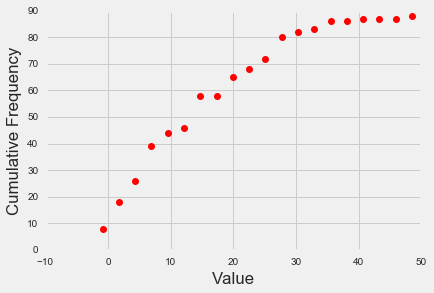

In [31]:
counts, start, dx, _ = scipy.stats.cumfreq(df["Proportion of Undernourished in the Population (%)"], numbins=20)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

plt.show()

# Global Hunger Index Metrics

In [39]:
trace3 = go.Histogram(
    x=df["Under 5 Mortality Rate"],
    name='Under 5 Mortality Rate',
    xbins=dict(
        start=-3.0,
        end=70,
        size=2
    ),
    marker=dict(
        color='#002f7c'
    ),
    opacity=1
)
trace2 = go.Histogram(
    x=df["Proportion of Undernourished in the Population (%)"],
    name='Proportion of Undernourished in the Population (%)',
    xbins=dict(
        start=-3.0,
        end=70,
        size=2
    ),
    marker=dict(
        color='#5995f7'
    ),
    opacity=1
)
trace1 = go.Histogram(
    x=df["Prevalence of Underweight in Children Under 5 Years"],
    name='Prevalence of Underweight in Children Under 5 Years',
    xbins=dict(
        start=-3.0,
        end=70,
        size=2
    ),
    marker=dict(
        color='#bed3f4'
    ),
    opacity=1
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='overlay',
    bargap=0.1,
    title = "Frequency of the Global Hunger Index Metrics",
     xaxis=dict(
        title='Metrics of the Global Hunger Index'
    ),
    yaxis=dict(
        title='Frequency'
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Feed Crops

In [41]:
trace3 = go.Histogram(
    x=df["Maize import quantity (tonnes)"],
    name='Maize import quantity (tonnes)',
    xbins=dict(
        start=-3.0,
        end=10288434.0/2,
        size=400000
    ),
    marker=dict(
        color='#2d4201'
    ),
    opacity=1
)
trace2 = go.Histogram(
    x=df["Wheat import quantity (tonnes)"],
    name='Wheat import quantity (tonnes)',
    xbins=dict(
        start=-3.0,
        end=10288434.0/2,
        size=400000
    ),
    marker=dict(
        color='#74a806'
    ),
    opacity=1
)
trace1 = go.Histogram(
    x=df["Potato import quantity (tonnes)"],
    name='Potato import quantity (tonnes)',
    xbins=dict(
        start=-3.0,
        end=10288434.0/2,
        size=400000
    ),
    marker=dict(
        color='#aacc63'
    ),
    opacity=1
)
data = [trace3, trace2, trace1]

layout = go.Layout(
    title = "Frequency of Staple Food Imports: Maize, Wheat, and Potatoes",
     xaxis=dict(
        title='Food Imports in tonnes'
    ),
    yaxis=dict(
        title='Frequency'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

In [43]:
trace1 = go.Scatter(
    x = df["Maize import quantity (tonnes)"],
    y = df["2014 GHI"],
    mode='markers',
    marker=dict(
        color='#2d4201',
        size = 10,
        opacity = 0.75
    ),
)

layout = go.Layout(
    title = "Relationship between Total Maize Imports and the Global Hunger Index Across Countries",
     xaxis=dict(
        title='Maize Imports (tonnes)'
    ),
    yaxis=dict(
        title='Global Hunger Index'
    )
)

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [44]:
trace1 = go.Scatter(
    x = df["Wheat import quantity (tonnes)"],
    y = df["2014 GHI"],
    mode='markers',
    marker=dict(
        color='#74a806',
        size = 10,
        opacity = 0.75
    ),
)

layout = go.Layout(
    title = "Relationship between Total Wheat Imports and the Global Hunger Index Across Countries",
     xaxis=dict(
        title='Wheat Imports (tonnes)'
    ),
    yaxis=dict(
        title='Global Hunger Index'
    )
)

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [45]:
trace1 = go.Scatter(
    x = df["Potato import quantity (tonnes)"],
    y = df["2014 GHI"],
    mode='markers',
    marker=dict(
        color='#aacc63',
        size = 10,
        opacity = .75
    ),
)

layout = go.Layout(
    title = "Relationship between Total Potato Imports and the Global Hunger Index Across Countries",
     xaxis=dict(
        title='Potato Imports (tonnes)'
    ),
    yaxis=dict(
        title='Global Hunger Index'
    )
)

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [46]:
trace1 = go.Histogram(
    x=df["2014 GHI"],
    xbins=dict(
        start=-3.0,
        end=70,
        size=1
    ),
    marker=dict(
        color='#5995f7'
    ),
    opacity=1
)

data = [trace1]
layout = go.Layout(
    barmode='overlay',
    bargap=0.1,
    title = "Frequency of the Global Hunger Index",
     xaxis=dict(
        title='Global Hunger Index'
    ),
    yaxis=dict(
        title='Frequency'
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)